<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/sm_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [189]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [190]:
import warnings

warnings.filterwarnings('ignore')

input

In [191]:
df = pd.read_csv("sm_cur.csv")

exploratory

In [192]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        98 non-null     int64
 1   Problem Solving  98 non-null     int64
 2   Interaction      98 non-null     int64
 3   Impact           98 non-null     int64
 4   Accountability   98 non-null     int64
dtypes: int64(5)
memory usage: 4.0 KB


In [193]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,219,87,66,169,25
1,219,87,66,169,25
2,219,87,66,169,25
3,219,87,66,169,25
4,219,87,66,169,25


checks

In [194]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,231.377551,87.632653,74.234694,191.102041,38.836735
std,32.535948,15.583753,17.024422,21.466584,14.085669
min,150.000000,65.000000,49.000000,141.000000,0.000000
25%,219.000000,87.000000,66.000000,169.000000,28.000000
50%,219.000000,87.000000,66.000000,190.500000,40.000000
75%,258.000000,87.000000,84.750000,213.000000,45.000000
max,300.000000,117.000000,125.000000,230.000000,75.000000


In [195]:
X=df

Scaling

In [196]:
cols = X.columns

In [197]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [198]:
X = pd.DataFrame(X, columns=[cols])

In [199]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.46,0.423077,0.223684,0.314607,0.333333
1,0.46,0.423077,0.223684,0.314607,0.333333
2,0.46,0.423077,0.223684,0.314607,0.333333
3,0.46,0.423077,0.223684,0.314607,0.333333
4,0.46,0.423077,0.223684,0.314607,0.333333


In [200]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.460000,0.423077,0.223684,0.314607,0.333333
1,0.460000,0.423077,0.223684,0.314607,0.333333
2,0.460000,0.423077,0.223684,0.314607,0.333333
3,0.460000,0.423077,0.223684,0.314607,0.333333
4,0.460000,0.423077,0.223684,0.314607,0.333333
...,...,...,...,...,...
93,0.766667,0.423077,0.223684,0.460674,0.706667
94,0.460000,1.000000,0.539474,0.808989,0.560000
95,0.766667,0.423077,0.223684,1.000000,0.800000
96,0.460000,1.000000,0.539474,0.808989,0.733333


K means

In [201]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [202]:
kmeans.cluster_centers_

array([[0.66421053, 0.90890688, 0.68074792, 0.76404494, 0.56842105],
       [0.51324895, 0.32132425, 0.24816789, 0.5145783 , 0.50565401]])

inertia

In [203]:
kmeans.inertia_

17.690659114983045

Elbow

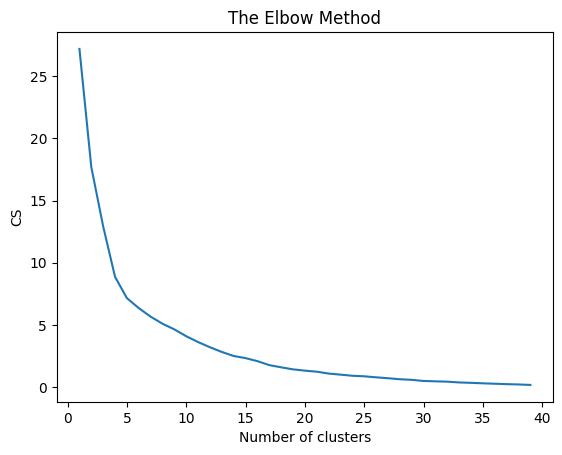

In [204]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

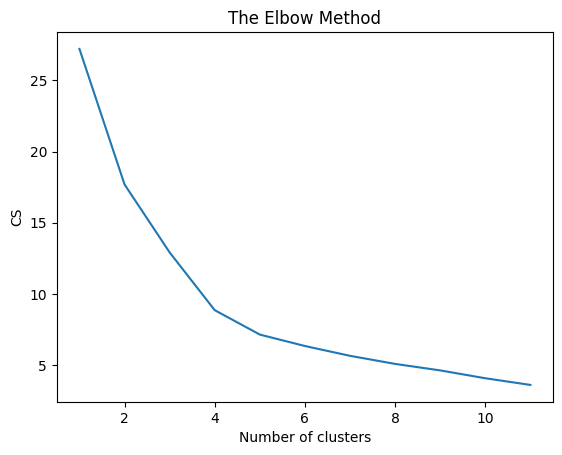

In [205]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [236]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [237]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('sm_aug_l.csv')
print(labels)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 1 3 3 3 3 3 3 2 2 3 3 0 0 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1 1 0 0 2 0 2 0]


In [238]:
Z=kmeans.cluster_centers_
Z

array([[ 6.68958333e-01,  4.23076923e-01,  2.83305921e-01,
         7.46137640e-01,  4.75416667e-01],
       [ 3.69122807e-01, -5.55111512e-17,  1.67590028e-01,
         5.00887049e-01,  7.28421053e-01],
       [ 6.88235294e-01,  9.66063348e-01,  6.68730650e-01,
         7.77263714e-01,  5.70196078e-01],
       [ 4.34888889e-01,  4.23076923e-01,  2.97368421e-01,
         2.85393258e-01,  4.00000000e-01]])

[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.001s...
[t-SNE] Computed neighbors for 98 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.656672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 120.240952
[t-SNE] KL divergence after 5000 iterations: -0.590416


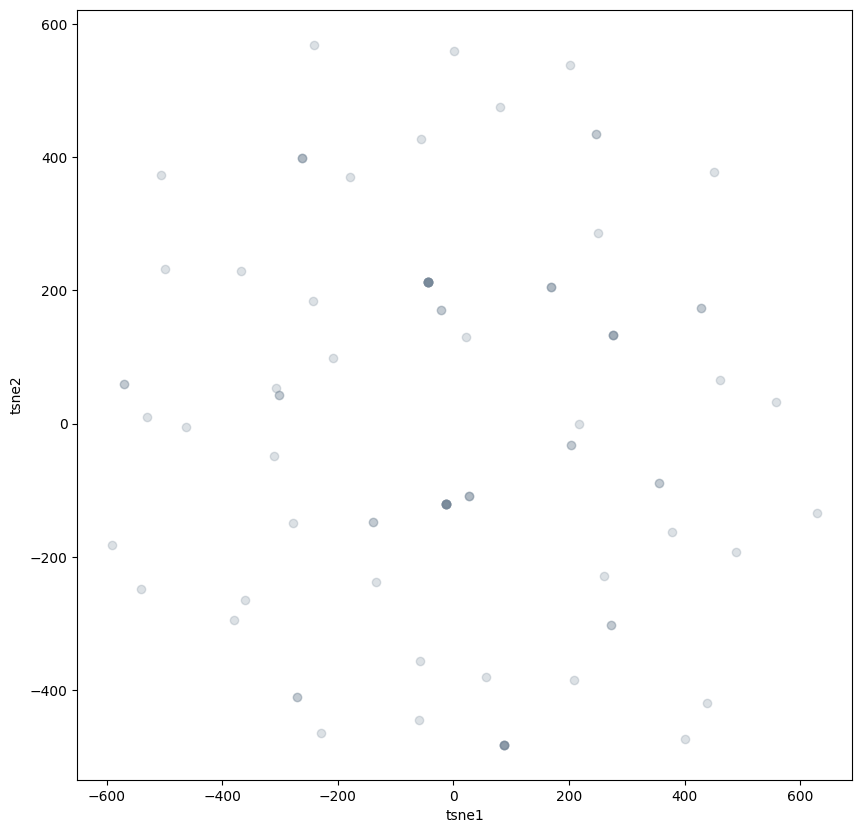

In [239]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [240]:
import matplotlib

In [241]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.001s...
[t-SNE] Computed neighbors for 98 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.656672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.604774
[t-SNE] KL divergence after 2500 iterations: -0.546258


In [242]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

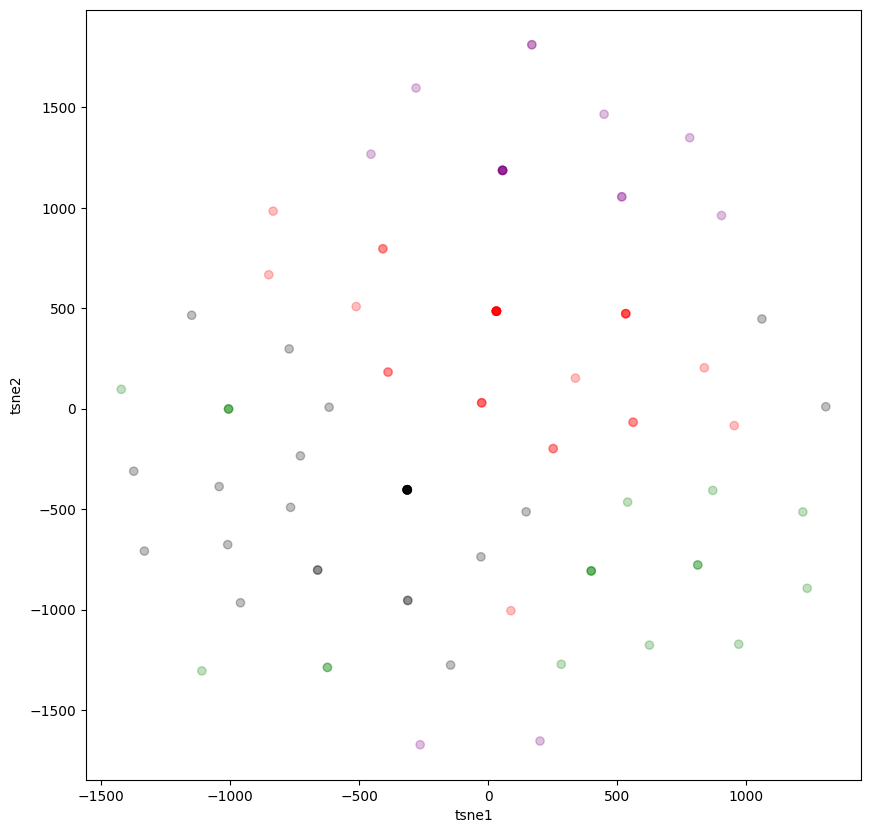

In [243]:
colors = ["red","green","blue","purple","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [244]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_sm_aug.csv')
Z2

array([[147.19633812,  44.72282795,  44.2090408 , 132.08166929,
         13.03229056],
       [135.42472783,  39.75900093,  43.21257379, 126.33999098,
         13.84964349],
       [147.95315594,  51.09351503,  47.52805788, 132.81037662,
         13.33848379],
       [138.00671901,  44.72282795,  44.33013754, 121.29496329,
         12.78865039]])

In [245]:
P = pd.read_csv("tr.csv")
P.dropna(inplace=True)
P = ms.fit_transform(P)
P2=kmeans.predict(P)
P2

array([1, 2, 3, 3, 0], dtype=int32)